In [1]:
!pip install numpy pandas matplotlib scikit-learn scipy torch

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [3]:
RANDOM_STATE = 42

X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)

df = pd.DataFrame(X, columns=['x', 'y'])
df['true_label'] = y_true

df.head()


,x,y,true_label
0,-7.338988,-7.729954,2
1,-7.740041,-7.264665,2
2,-1.686653,7.793442,0
3,4.422198,3.071947,1
4,-8.917752,-7.888196,2


In [4]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
kmeans.fit(df[['x', 'y']])

df['kmeans_label'] = kmeans.labels_
centers = kmeans.cluster_centers_

df.head()


C:\Users\jhyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,x,y,true_label,kmeans_label
0,-7.338988,-7.729954,2,1
1,-7.740041,-7.264665,2,1
2,-1.686653,7.793442,0,0
3,4.422198,3.071947,1,2
4,-8.917752,-7.888196,2,1


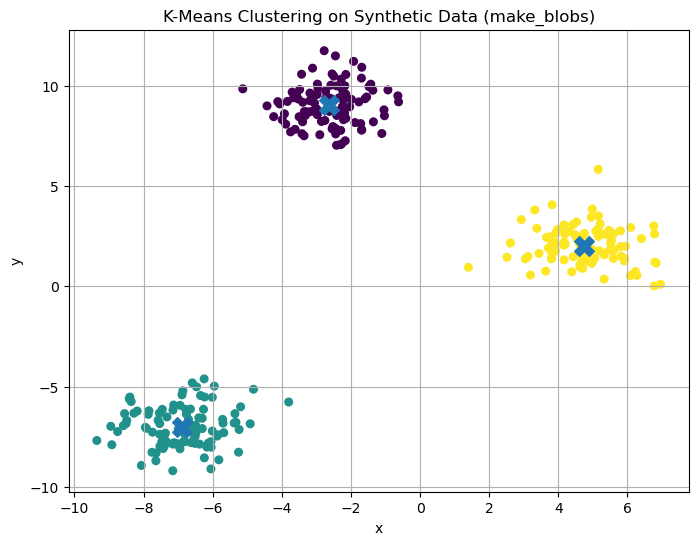

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(df['x'], df['y'], s=30, c=df['kmeans_label'])
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.title("K-Means Clustering on Synthetic Data (make_blobs)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
